In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

Define a couple of functions -- a sine wave and then a quadratic potential

In [3]:
def func(x):
    return jnp.sin(x) ** 2
def pot(x):
    return x ** 2

How to calculate the gradient in JAX

In [4]:
func_grad = jax.grad(func)

Plotting a function and its gradient

<IPython.core.display.Javascript object>


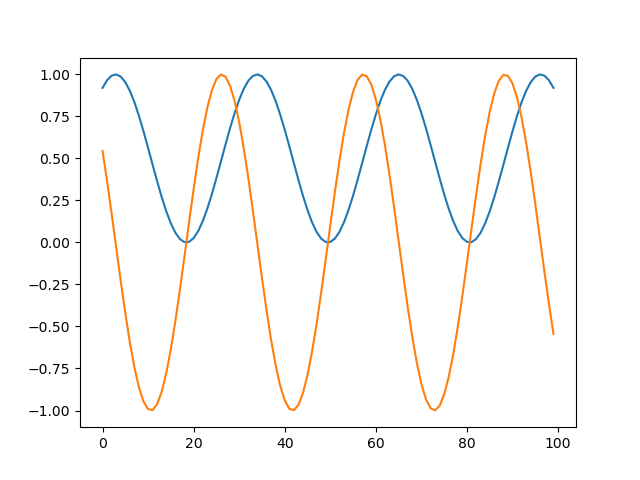

In [5]:
plt.figure()
plt.plot(func(jnp.linspace(-5, 5, 100)))
# Need jax.vmap to vectorize the function
plt.plot(jax.vmap(func_grad)(jnp.linspace(-5, 5, 100)))

Defining a new function that's the sum of the sine wave and the potential

In [6]:
f = lambda x: func(x) + 0.05 * pot(x)

<IPython.core.display.Javascript object>


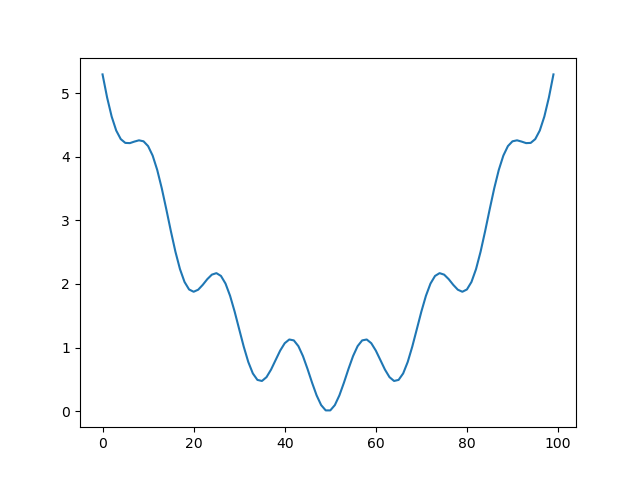

In [7]:
plt.figure()
plt.plot(f(jnp.linspace(-10, 10, 100)))

Calculate the gradient of this new function with respect to the inputs, which in this case is just `x`

In [8]:
dfdx = jax.grad(f)

<IPython.core.display.Javascript object>


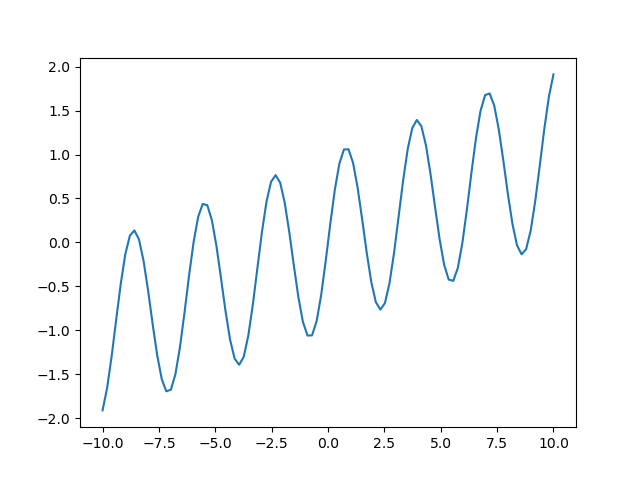

In [9]:
plt.figure()
plt.plot(jnp.linspace(-10, 10, 100), jax.vmap(dfdx)(jnp.linspace(-10, 10, 100)))

Generate some random samples to be moved according to the gradient of the function

In [10]:
samples = jax.random.uniform(jax.random.PRNGKey(1), shape=(10,), minval=-10, maxval=10)

Plot of the samples

<IPython.core.display.Javascript object>


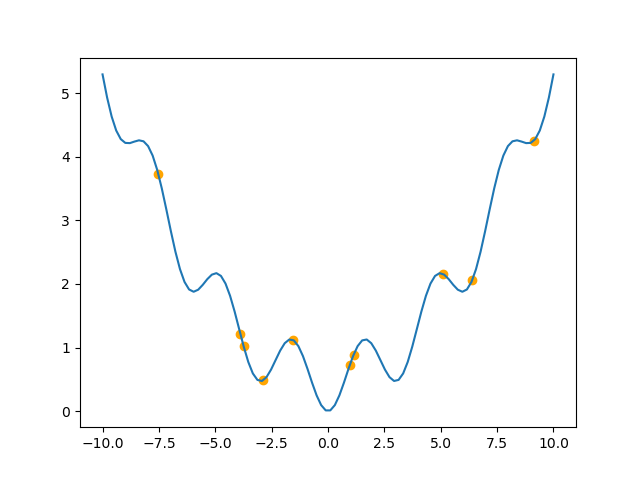

In [11]:
plt.figure()
plt.plot(jnp.linspace(-10, 10, 100), f(jnp.linspace(-10, 10, 100)))
plt.scatter(samples, f(samples), c='orange')

Define a function to move the samples points/particles according to the gradient of some function. The gradient is multipled by the step size before applying it

In [12]:
def move_samples(gradient_func, samples, step_size):
    grads = jax.vmap(gradient_func)(samples)
    new_samples = samples - grads * step_size
    return new_samples

In [13]:
new_samples = move_samples(dfdx, samples, 1)

Blue = curve, orange dots = samples, green arrows = where the new samples are after a gradient step

<IPython.core.display.Javascript object>


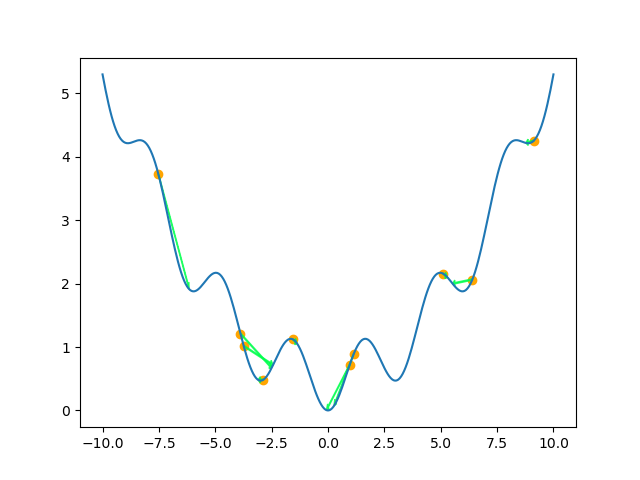

In [14]:
plt.figure()
plt.plot(jnp.linspace(-10, 10, 300), f(jnp.linspace(-10, 10, 300)))
plt.scatter(samples, f(samples), c='orange')
# plt.scatter(new_samples, f(new_samples), c='red')
for i in range(samples.shape[0]):
    plt.arrow(samples[i], f(samples[i]), new_samples[i]-samples[i], f(new_samples[i])-f(samples[i]),
              width=0.02, head_width=0.1, head_length=0.1, length_includes_head=True, color=(0.0, 1.0, 0.3, 0.8))

Do the same thing again. You can see the particles converging to local minima

In [15]:
new_samples_2 = move_samples(dfdx, new_samples, 1)

<IPython.core.display.Javascript object>


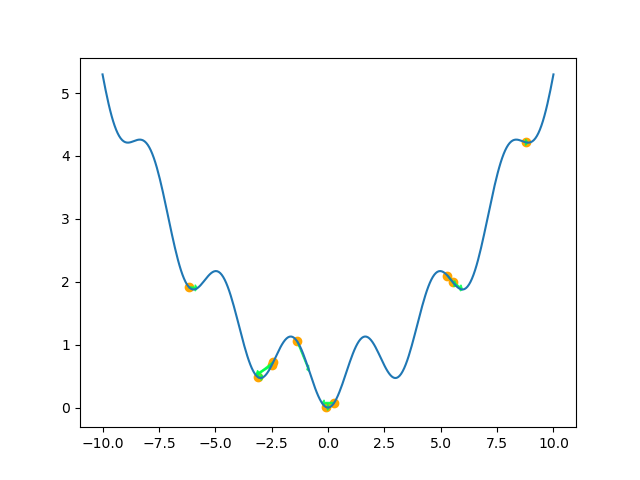

In [16]:
plt.figure()
plt.plot(jnp.linspace(-10, 10, 300), f(jnp.linspace(-10, 10, 300)))
plt.scatter(new_samples, f(new_samples), c='orange')
# plt.scatter(new_samples_2, f(new_samples_2), c='red')
for i in range(new_samples.shape[0]):
    plt.arrow(new_samples[i], f(new_samples[i]), new_samples_2[i]-new_samples[i], f(new_samples_2[i])-f(new_samples[i]),
              width=0.02, head_width=0.1, head_length=0.1, length_includes_head=True, color=(0.0, 1.0, 0.3, 0.8))

# Two variables

You can also take gradients of two (or more) variables

In [17]:
def two_var_func(x, y):
    return func(x) + 0.05 * pot(y)

The 2nd argument in jax.grad are which parameters the gradient is taken with respect to. Gradients of vector-valued functions can be calculated with jax.jacfwd or jax.jacrev depending on if you want forward-mode or reverse-mode autodifferentiation (which depends on what sort of problem you're solving) 

In [18]:
df = jax.grad(two_var_func, (0, 1))

In [19]:
df(1.0, 3.0)

(DeviceArray(0.90929735, dtype=float32, weak_type=True),
 DeviceArray(0.3, dtype=float32, weak_type=True))